###ASSIGNMENT-4

###MARIDE HARSHITH

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load the Dataset

In [2]:
df=pd.read_csv('/content/winequality-red[1].csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.shape

(1599, 12)

###Data preprocessing including visualization

####Checking for null values

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

####Hence, there are no null values

###Data visualization

##Univariate

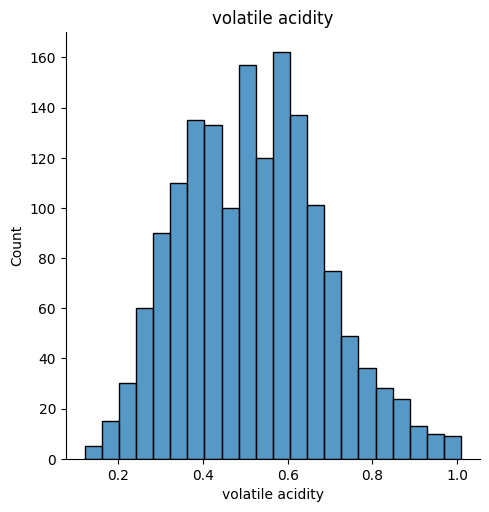

In [117]:
sns.displot(df['volatile acidity'])
plt.title('volatile acidity')
plt.show()

<Axes: >

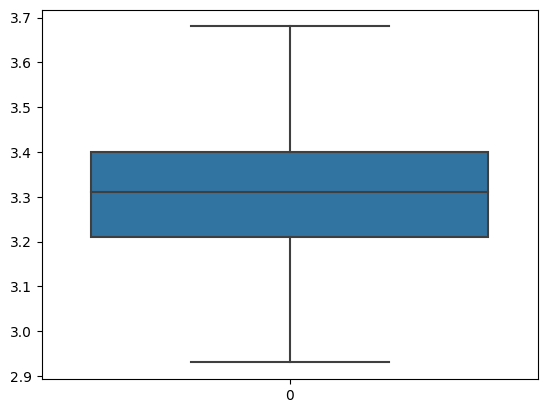

In [118]:
sns.boxplot(df['pH'])

###Bivariate

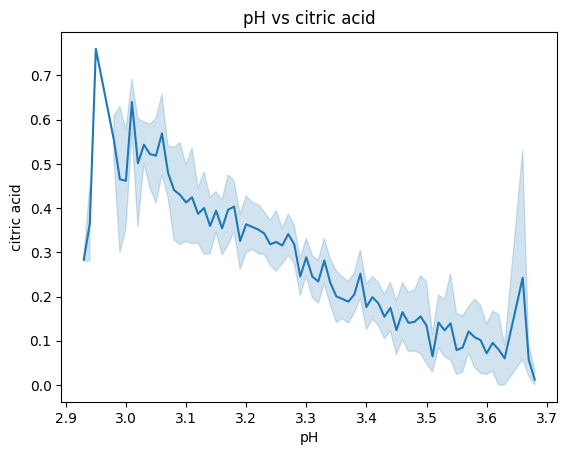

In [119]:
sns.lineplot(x=df['pH'],y=df['citric acid'])
plt.title('pH vs citric acid')
plt.show()

###Multivariate

<Axes: >

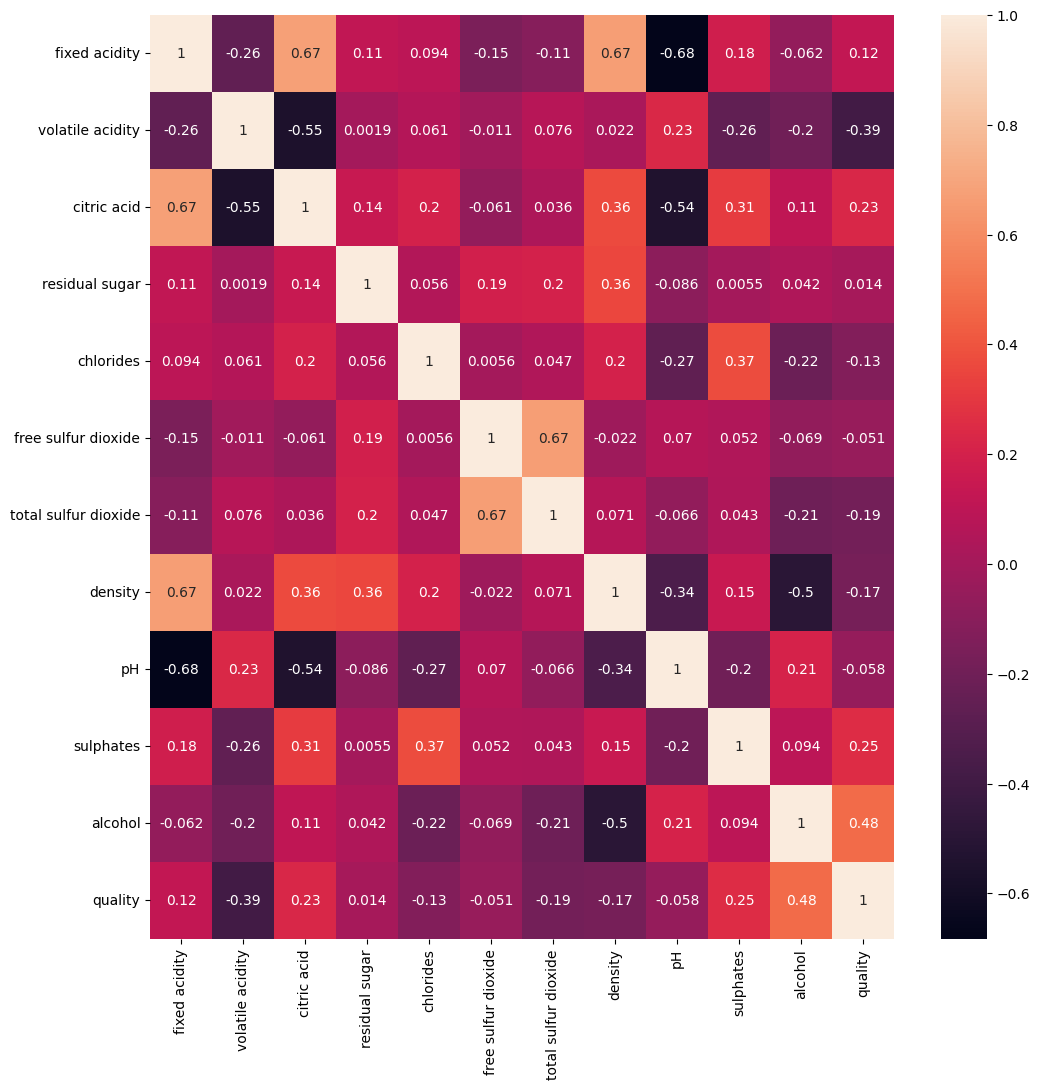

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

###Correlation with respect to target

In [13]:
df.corr().quality.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

###Checking for outliers

<Axes: >

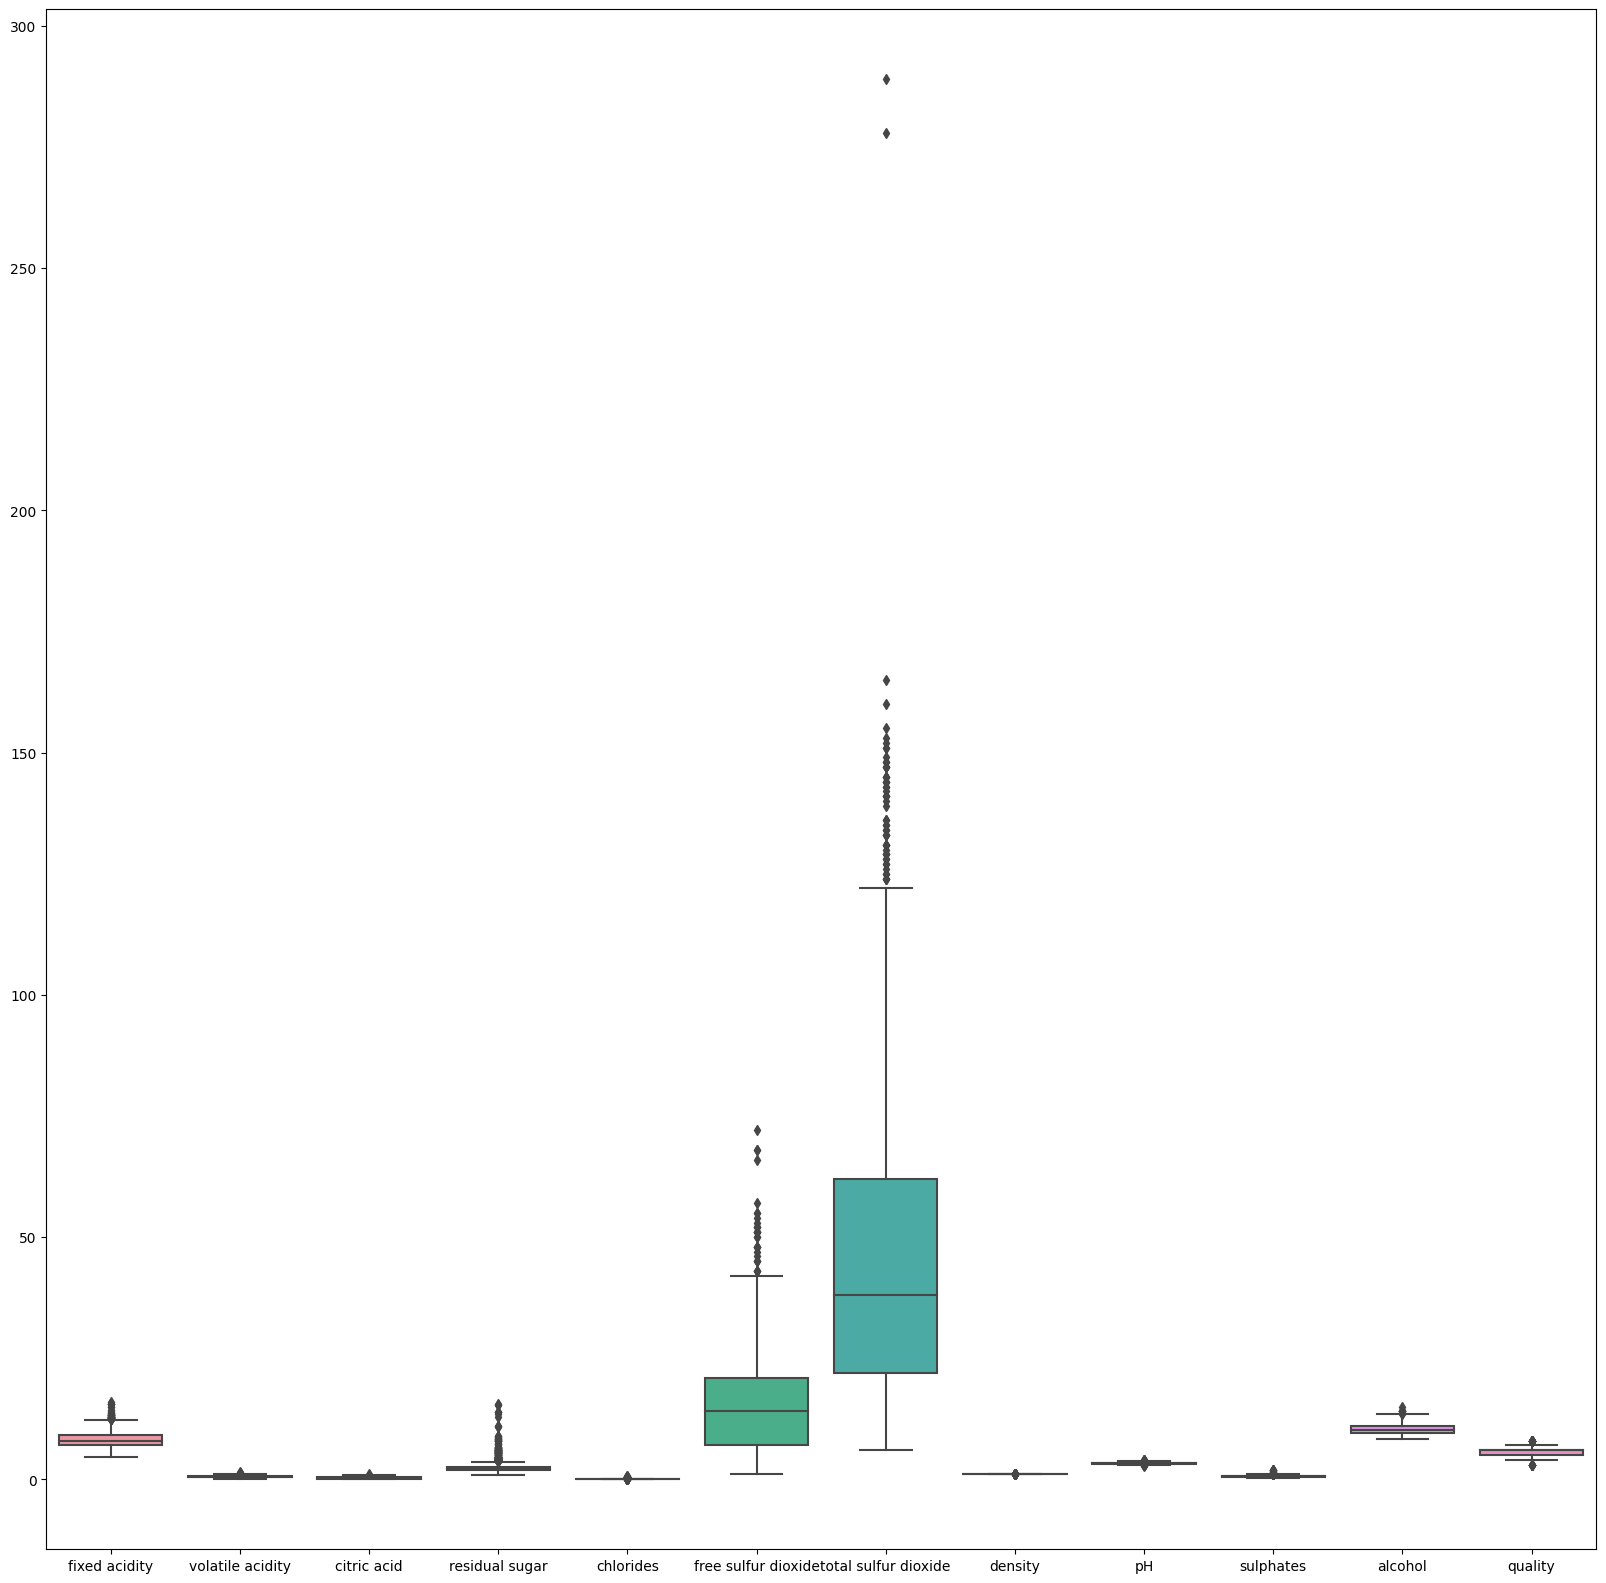

In [14]:
plt.figure(figsize=(20,20))
sns.boxplot(df)

In [15]:
q1=df.alcohol.quantile(0.25)
q3=df.alcohol.quantile(0.75)

In [16]:
IQR=q3-q1
IQR

1.5999999999999996

In [17]:
ul=q3+1.5*IQR
ul

13.5

In [18]:
ll=q1-1.5*IQR
ll

7.1000000000000005

In [19]:
df.alcohol.median()

10.2

In [20]:
df['alcohol']=np.where(df['alcohol']>ul,df.alcohol.median(),df['alcohol'])

<Axes: >

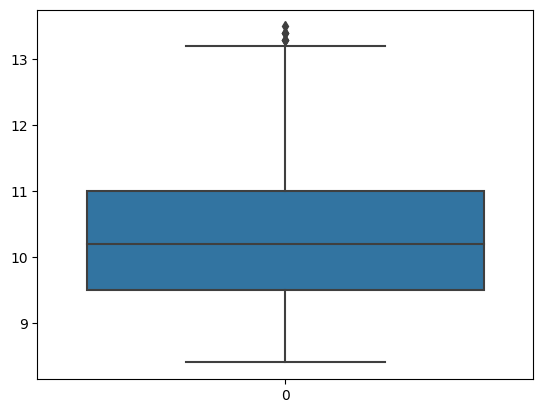

In [21]:
sns.boxplot(df['alcohol'])

<Axes: >

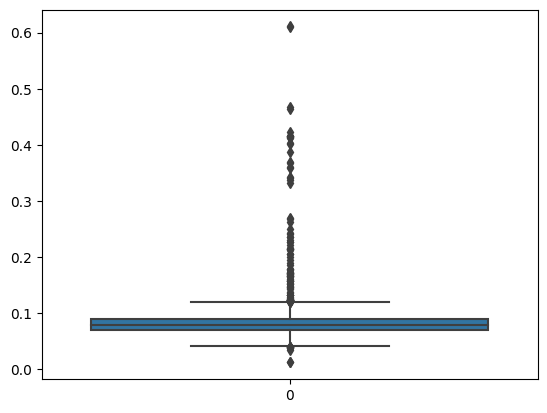

In [22]:
sns.boxplot(df['chlorides'])

In [23]:
q1=df.chlorides.quantile(0.25)
q3=df.chlorides.quantile(0.75)

In [24]:
IQR=q3-q1
IQR

0.01999999999999999

In [25]:
ul=q3+1.5*IQR
ll=q1-1.5*IQR

In [26]:
df.chlorides=np.where(df.chlorides>ul,df.chlorides.median(),df.chlorides)

In [27]:
df.chlorides=np.where(df.chlorides<ll,df.chlorides.median(),df.chlorides)

<Axes: >

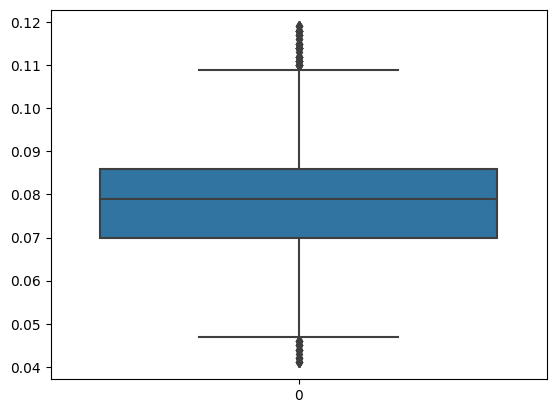

In [28]:
sns.boxplot(df['chlorides'])

In [29]:
q1=df['total sulfur dioxide'].quantile(0.25)
q3=df['total sulfur dioxide'].quantile(0.75)

In [30]:
IQR=q3-q1
IQR

40.0

In [31]:
ul=q3+1.5*IQR
ll=q1-1.5*IQR

In [32]:
df['total sulfur dioxide']=np.where(df['total sulfur dioxide']>ul,df['total sulfur dioxide'].median(),df['total sulfur dioxide'])

In [33]:
q1=df['free sulfur dioxide'].quantile(0.25)
q3=df['free sulfur dioxide'].quantile(0.75)

In [34]:
IQR=q3-q1
IQR

14.0

In [35]:
ul=q3+1.5*IQR
ll=q1-1.5*IQR

In [36]:
df['free sulfur dioxide']=np.where(df['free sulfur dioxide']>ul,df['free sulfur dioxide'].median(),df['free sulfur dioxide'])

In [38]:
q1=df['fixed acidity'].quantile(0.25)
q3=df['fixed acidity'].quantile(0.75)

In [39]:
IQR=q3-q1
IQR

2.0999999999999996

In [40]:
ul=q3+1.5*IQR
ll=q1-1.5*IQR

In [41]:
df['fixed acidity']=np.where(df['fixed acidity']>ul,df['fixed acidity'].median(),df['fixed acidity'])

In [43]:
q1=df['volatile acidity'].quantile(0.25)
q3=df['volatile acidity'].quantile(0.75)

In [44]:
IQR=q3-q1
IQR

0.25

In [45]:
ul=q3+1.5*IQR
ll=q1-1.5*IQR

In [46]:
df['volatile acidity']=np.where(df['volatile acidity']>ul,df['volatile acidity'].median(),df['volatile acidity'])

In [48]:
q1=df['citric acid'].quantile(0.25)
q3=df['citric acid'].quantile(0.75)

In [49]:
IQR=q3-q1
IQR

0.32999999999999996

In [50]:
ul=q3+1.5*IQR
ll=q1-1.5*IQR

In [51]:
df['citric acid']=np.where(df['citric acid']>ul,df['citric acid'].median(),df['citric acid'])

In [52]:
q1=df['residual sugar'].quantile(0.25)
q3=df['residual sugar'].quantile(0.75)

In [53]:
IQR=q3-q1
IQR

0.7000000000000002

In [54]:
ul=q3+1.5*IQR
ll=q1-1.5*IQR

In [55]:
df['residual sugar']=np.where(df['residual sugar']>ul,df['residual sugar'].median(),df['residual sugar'])

In [56]:
df['residual sugar']=np.where(df['residual sugar']<ll,df['residual sugar'].median(),df['residual sugar'])

In [57]:
q1=df['pH'].quantile(0.25)
q3=df['pH'].quantile(0.75)

In [58]:
IQR=q3-q1
IQR

0.18999999999999995

In [59]:
ul=q3+1.5*IQR
ll=q1-1.5*IQR

In [60]:
df['pH']=np.where(df['pH']>ul,df['pH'].median(),df['pH'])

In [61]:
df['pH']=np.where(df['pH']<ll,df['pH'].median(),df['pH'])

In [62]:
q1=df['sulphates'].quantile(0.25)
q3=df['sulphates'].quantile(0.75)

In [63]:
IQR=q3-q1
IQR

0.17999999999999994

In [64]:
ul=q3+1.5*IQR
ll=q1-1.5*IQR

In [65]:
df['sulphates']=np.where(df['sulphates']>ul,df['sulphates'].median(),df['sulphates'])

In [66]:
df['sulphates']=np.where(df['sulphates']<ll,df['sulphates'].median(),df['sulphates'])

In [67]:
q1=df['density'].quantile(0.25)
q3=df['density'].quantile(0.75)

In [68]:
IQR=q3-q1
IQR

0.002234999999999987

In [69]:
ul=q3+1.5*IQR
ll=q1-1.5*IQR

In [70]:
df['density']=np.where(df['density']>ul,df['density'].median(),df['density'])

In [71]:
df['density']=np.where(df['density']<ll,df['density'].median(),df['density'])

In [72]:
q1=df['quality'].quantile(0.25)
q3=df['quality'].quantile(0.75)

In [73]:
IQR=q3-q1
IQR

1.0

In [74]:
ul=q3+1.5*IQR
ll=q1-1.5*IQR

In [75]:
df['quality']=np.where(df['quality']>ul,df['quality'].median(),df['quality'])

In [76]:
df['quality']=np.where(df['quality']<ll,df['quality'].median(),df['quality'])

<Axes: >

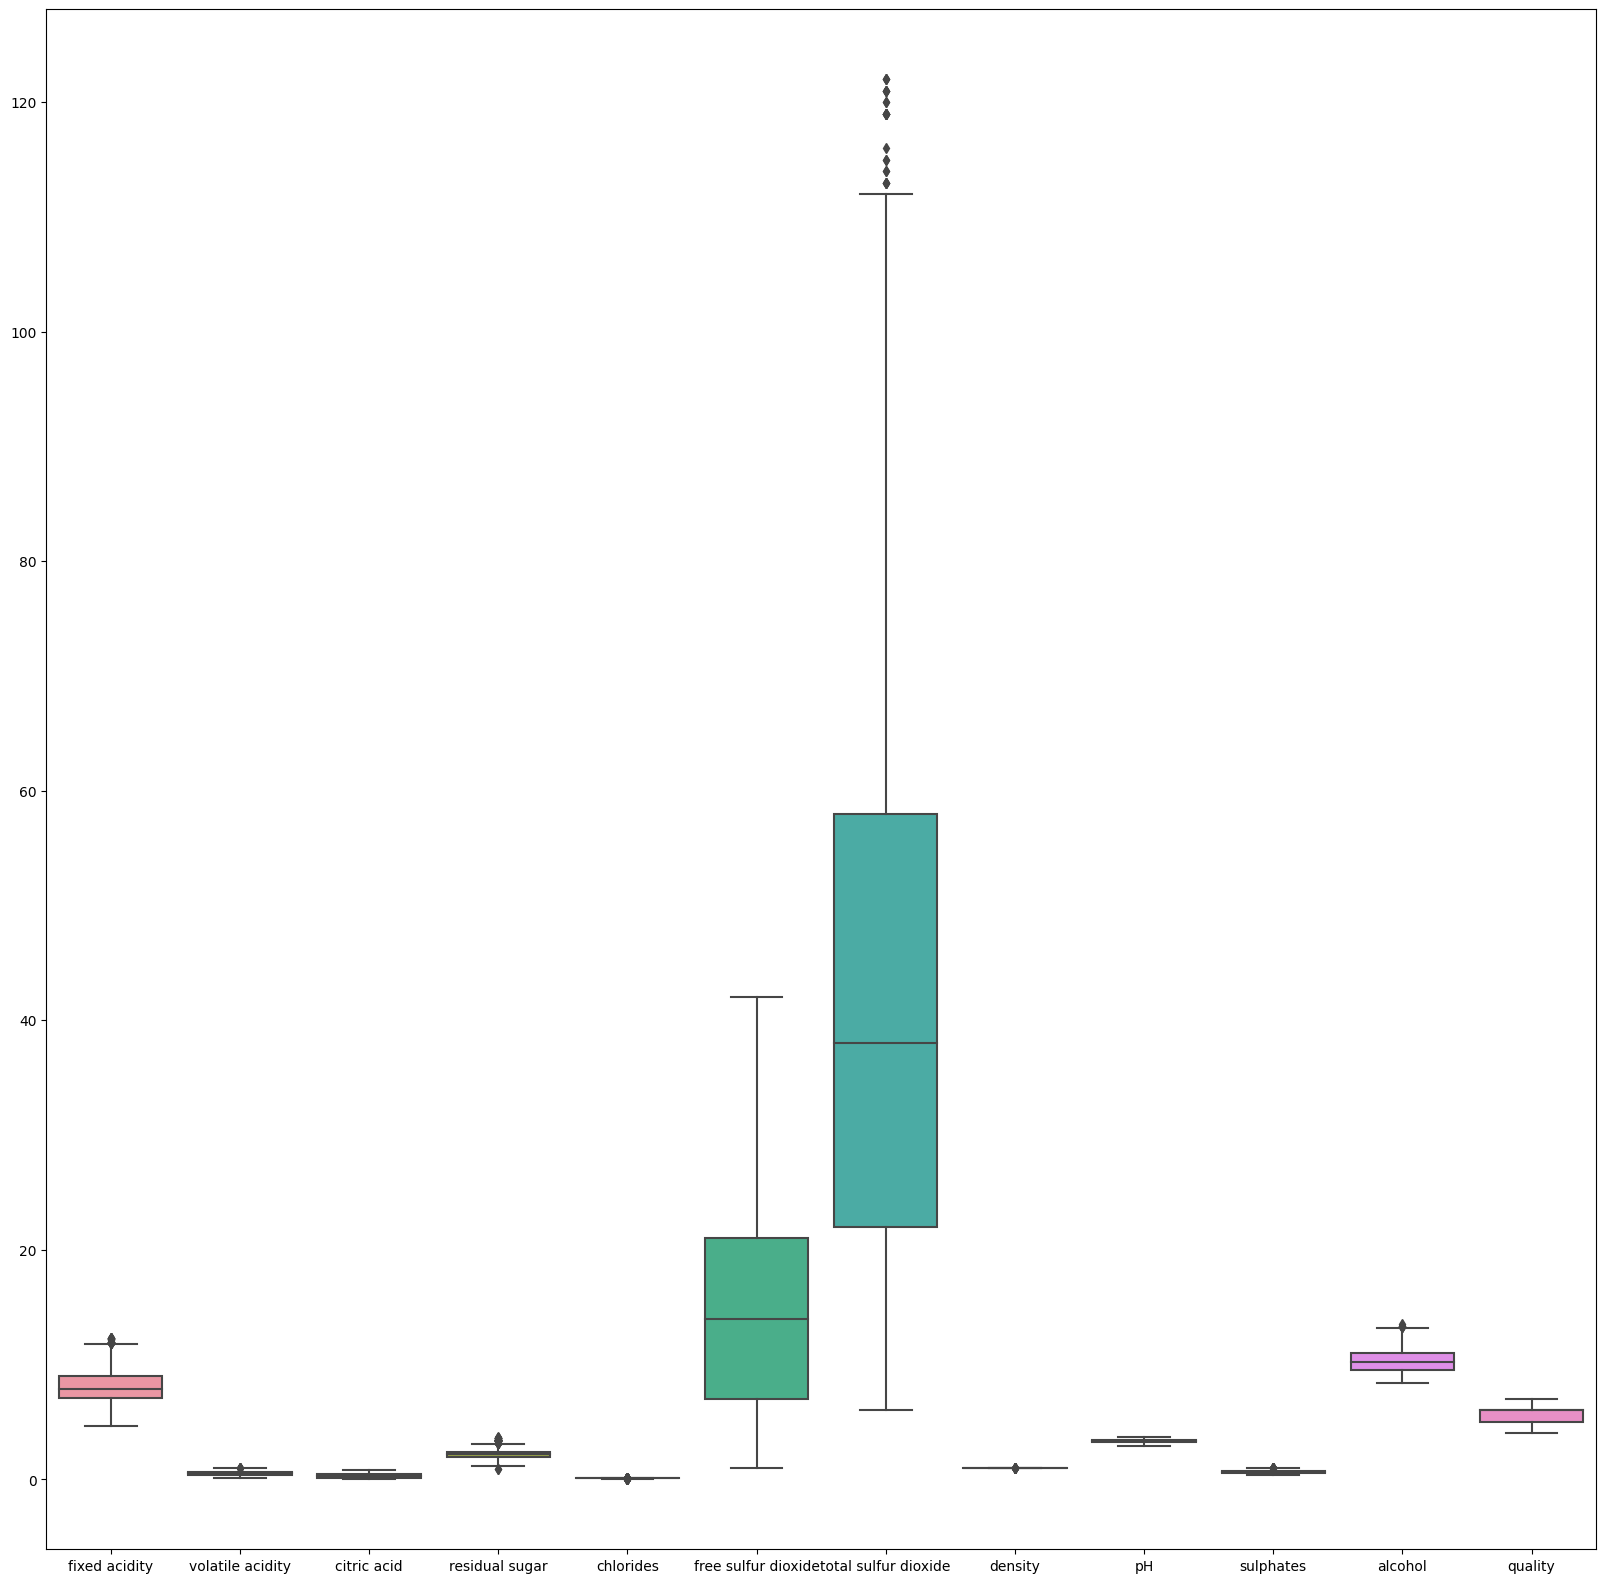

In [77]:
plt.figure(figsize=(20,20))
sns.boxplot(df)

###Hence, we replaced all the outliers

###X and Y split (x independent variables, y dependent variable)

In [78]:
x=df.drop(columns=['quality'],axis=1)
y=df.quality

In [79]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [80]:
y.head()

0    5.0
1    5.0
2    5.0
3    6.0
4    5.0
Name: quality, dtype: float64

###Scaling Independent variables

In [81]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [82]:
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)


In [83]:
x_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.363636,0.651685,0.000000,0.363636,0.448718,0.243902,0.241379,0.630058,0.773333,0.348485,0.196078
1,0.415584,0.853933,0.000000,0.618182,0.730769,0.585366,0.525862,0.514451,0.360000,0.530303,0.274510
2,0.415584,0.719101,0.050633,0.509091,0.653846,0.341463,0.413793,0.537572,0.440000,0.484848,0.274510
3,0.857143,0.179775,0.708861,0.363636,0.435897,0.390244,0.465517,0.653179,0.306667,0.378788,0.274510
4,0.363636,0.651685,0.000000,0.363636,0.448718,0.243902,0.241379,0.630058,0.773333,0.348485,0.196078
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.207792,0.539326,0.101266,0.400000,0.628205,0.756098,0.327586,0.294798,0.693333,0.378788,0.411765
1595,0.168831,0.483146,0.126582,0.472727,0.269231,0.926829,0.387931,0.320231,0.786667,0.651515,0.549020
1596,0.220779,0.438202,0.164557,0.509091,0.448718,0.682927,0.293103,0.391908,0.653333,0.636364,0.509804
1597,0.168831,0.589888,0.151899,0.400000,0.435897,0.756098,0.327586,0.360694,0.853333,0.575758,0.352941


###Train-test-split

In [84]:
from sklearn.model_selection import train_test_split

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=10)

In [121]:
x_train.shape

(1279, 11)

In [122]:
x_test.shape

(320, 11)

###Machine Learning Model building

###Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
lr=LogisticRegression()

In [125]:
lr.fit(x_train,y_train)

LogisticRegression()

In [126]:
y_pred_train=lr.predict(x_train)

In [127]:
y_pred=lr.predict(x_test)


In [128]:
pd.DataFrame({'y_actual':y_test,'y_pred':y_pred})

,y_actual,y_pred
1518,5.0,6.0
1246,5.0,5.0
544,6.0,5.0
1343,6.0,6.0
428,5.0,5.0
...,...,...
821,7.0,6.0
1086,7.0,6.0
805,7.0,7.0
678,5.0,5.0


###Evaluate the model

In [129]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [130]:
accuracy_score(y_train,y_pred_train)

0.6121970289288506

In [131]:
accuracy_score(y_test,y_pred)

0.571875

In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00         9
         5.0       0.64      0.71      0.67       132
         6.0       0.53      0.61      0.57       137
         7.0       0.38      0.12      0.18        42

    accuracy                           0.57       320
   macro avg       0.39      0.36      0.36       320
weighted avg       0.54      0.57      0.54       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
pd.crosstab(y_test,y_pred)

col_0,5.0,6.0,7.0
quality,,,
4.0,7,2,0
5.0,94,38,0
6.0,45,84,8
7.0,2,35,5


###Decision Tree Algorithm

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
dt=DecisionTreeClassifier()

In [136]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [137]:
dty_pred=dt.predict(x_test)
dty_pred

array([6., 5., 6., 6., 6., 6., 4., 5., 6., 5., 6., 7., 5., 5., 6., 5., 6.,
       6., 6., 5., 6., 7., 5., 5., 5., 4., 5., 5., 6., 5., 5., 6., 6., 7.,
       5., 5., 6., 7., 6., 5., 6., 6., 5., 5., 6., 4., 5., 7., 6., 5., 7.,
       7., 6., 7., 6., 7., 4., 6., 5., 5., 5., 5., 6., 5., 6., 6., 6., 6.,
       5., 5., 4., 5., 5., 6., 5., 5., 6., 7., 5., 6., 6., 5., 7., 5., 6.,
       6., 5., 5., 4., 5., 5., 7., 7., 6., 5., 6., 5., 5., 6., 6., 7., 5.,
       4., 6., 5., 5., 6., 6., 6., 5., 5., 6., 7., 5., 5., 5., 5., 5., 5.,
       6., 6., 6., 6., 5., 5., 4., 5., 5., 5., 6., 6., 5., 5., 5., 6., 7.,
       6., 5., 5., 5., 6., 6., 6., 5., 6., 6., 5., 5., 5., 6., 5., 5., 6.,
       7., 6., 5., 5., 5., 6., 7., 7., 6., 7., 5., 7., 6., 6., 7., 5., 5.,
       5., 5., 7., 6., 5., 6., 5., 5., 5., 7., 6., 5., 6., 6., 5., 5., 6.,
       6., 5., 5., 5., 6., 6., 7., 5., 6., 5., 5., 7., 6., 6., 6., 6., 5.,
       5., 7., 5., 5., 5., 7., 6., 6., 4., 5., 5., 6., 6., 5., 5., 5., 5.,
       6., 6., 6., 7., 5.

###Evaluating Decision Tree algorithm

In [138]:
accuracy_score(y_test,dty_pred)

0.578125

In [139]:
print(classification_report(y_test,dty_pred))

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00         9
         5.0       0.69      0.73      0.71       132
         6.0       0.58      0.52      0.55       137
         7.0       0.40      0.43      0.41        42

    accuracy                           0.58       320
   macro avg       0.42      0.42      0.42       320
weighted avg       0.58      0.58      0.58       320



In [140]:
pd.crosstab(y_test,dty_pred)

col_0,4.0,5.0,6.0,7.0
quality,,,,
4.0,0,5,3,1
5.0,3,96,30,3
6.0,8,35,71,23
7.0,2,4,18,18


##Using random tree classifier

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rf=RandomForestClassifier()

In [143]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [144]:
rfy_pred=rf.predict(x_test)

In [145]:
rfy_pred

array([5., 5., 6., 6., 6., 6., 6., 6., 6., 5., 7., 6., 5., 5., 6., 6., 6.,
       6., 6., 5., 5., 6., 6., 5., 5., 6., 5., 5., 6., 5., 5., 5., 6., 7.,
       5., 5., 7., 5., 6., 5., 6., 6., 5., 6., 5., 6., 6., 7., 6., 5., 6.,
       7., 6., 7., 6., 6., 5., 5., 5., 5., 5., 5., 7., 6., 6., 5., 6., 6.,
       5., 7., 5., 5., 5., 6., 6., 5., 5., 7., 5., 6., 7., 5., 6., 5., 6.,
       6., 6., 5., 6., 5., 7., 6., 7., 6., 5., 6., 5., 5., 6., 6., 7., 5.,
       5., 6., 6., 5., 5., 6., 6., 5., 5., 6., 7., 5., 5., 5., 5., 5., 6.,
       6., 5., 5., 6., 6., 5., 4., 5., 5., 5., 5., 6., 5., 6., 5., 6., 6.,
       6., 5., 5., 6., 6., 6., 5., 6., 5., 6., 5., 5., 6., 6., 5., 7., 6.,
       7., 6., 6., 5., 5., 6., 6., 6., 6., 6., 5., 5., 5., 6., 7., 6., 5.,
       5., 6., 5., 6., 5., 6., 5., 5., 5., 6., 5., 6., 6., 5., 5., 5., 5.,
       6., 5., 5., 5., 5., 6., 7., 6., 6., 5., 5., 7., 6., 6., 6., 6., 5.,
       5., 6., 5., 5., 5., 7., 6., 6., 6., 5., 5., 6., 6., 5., 5., 5., 5.,
       6., 5., 6., 6., 5.

In [146]:
rfy_pred_train=rf.predict(x_train)

###Evaluation for random tree classifier

In [147]:
accuracy_score(y_train,rfy_pred_train)

1.0

In [148]:
accuracy_score(y_test,rfy_pred)

0.690625

In [149]:
pd.crosstab(y_test,rfy_pred)

col_0,4.0,5.0,6.0,7.0
quality,,,,
4.0,0,4,5,0
5.0,0,108,23,1
6.0,1,30,96,10
7.0,0,3,22,17


In [150]:
print(classification_report(y_test,rfy_pred))

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00         9
         5.0       0.74      0.82      0.78       132
         6.0       0.66      0.70      0.68       137
         7.0       0.61      0.40      0.49        42

    accuracy                           0.69       320
   macro avg       0.50      0.48      0.49       320
weighted avg       0.67      0.69      0.68       320



###Test with random observation

In [151]:
rf.predict([[7.4,0.28,0.04,2.6,0.076,25,38,0.9978,3.51,0.67,9.4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5.])

###THANK YOU